In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-1, 1],
    c1 = [0.1, 2.0],
    c2 = [0.5, 2.0],
    w = 1.2,
    w_decay = 0.95))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 300
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

0646767304
update local, 0.6211948573032272
update global 0.6206320646767304
Iteration 148/300: 	0.6206320646767304
update local, 0.7589760183173919
update global 0.6206320646767304
Iteration 149/300: 	0.6206320646767304
update local, 0.6235153340847692
update local, 0.6695704950350467
update local, 0.6289819735232914
update local, 0.6463680802104629
update global 0.6206320646767304
Iteration 150/300: 	0.6206320646767304
update local, 0.6320226081063814
update local, 0.6438896678318488
update local, 0.6236495971679688
update local, 0.6391999431859667
update local, 0.6352315884884273
update global 0.6206320646767304
Iteration 151/300: 	0.6206320646767304
update local, 0.7165038206866968
update local, 0.6788329365097474
update global 0.6206320646767304
Iteration 152/300: 	0.6206320646767304
update local, 0.6256979113427278
update local, 0.6339117745372737
update local, 0.6360907153548482
update global 0.6206320646767304
update local, 0.6495516055098204
Iteration 153/300: 	0.6206320646767

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6782878982686551, 0.6735612387969115, 0.6735612387969115, 0.6735612387969115, 0.6735612387969115, 0.6735612387969115, 0.6735612387969115, 0.6735612387969115, 0.6618189588885441, 0.6618189588885441, 0.6618189588885441, 0.6618189588885441, 0.6618189588885441, 0.6618189588885441, 0.6577969132182754, 0.6577969132182754, 0.6577969132182754, 0.6577969132182754, 0.6577969132182754, 0.6577969132182754, 0.6577969132182754, 0.6577969132182754, 0.6577969132182754, 0.6577969132182754, 0.6577969132182754, 0.6522477051922094, 0.6522477051922094, 0.6522477051922094, 0.6522477051922094,

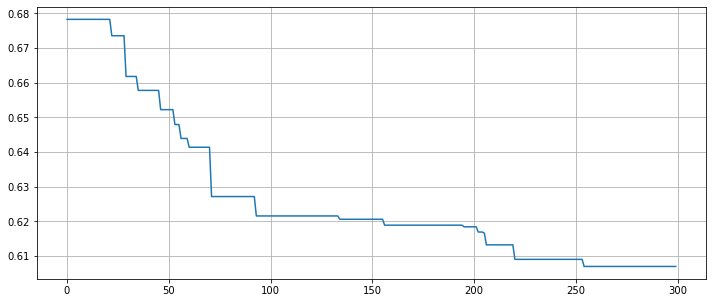

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.89544487]
 [0.07222012]
 [0.03233501]]
[0. 1. 0.] <-> [[0.8677546 ]
 [0.09287403]
 [0.0393714 ]]
[0. 1. 0.] <-> [[0.5027797 ]
 [0.31296197]
 [0.18425831]]
[0. 1. 0.] <-> [[0.73202246]
 [0.19835354]
 [0.06962393]]
[0. 1. 0.] <-> [[0.6481983 ]
 [0.27293116]
 [0.07887053]]
[1. 0. 0.] <-> [[0.6733042 ]
 [0.24932091]
 [0.07737489]]
[1. 0. 0.] <-> [[0.8870838 ]
 [0.07829889]
 [0.03461724]]
[1. 0. 0.] <-> [[0.6342391 ]
 [0.28449634]
 [0.08126459]]
[1. 0. 0.] <-> [[0.8946426 ]
 [0.07278803]
 [0.03256946]]
[1. 0. 0.] <-> [[0.8346757 ]
 [0.11856169]
 [0.04676258]]
[1. 0. 0.] <-> [[0.8973757 ]
 [0.07088939]
 [0.03173489]]
[1. 0. 0.] <-> [[0.6727249 ]
 [0.25204873]
 [0.07522631]]
[1. 0. 0.] <-> [[0.76930785]
 [0.17114583]
 [0.05954634]]
[0. 0. 1.] <-> [[0.895057  ]
 [0.07380122]
 [0.03114173]]
[0. 0. 1.] <-> [[0.6894766 ]
 [0.22072162]
 [0.08980177]]
[1. 0. 0.] <-> [[0.64248323]
 [0.27776128]
 [0.07975548]]
[1. 0. 0.] <-> [[0.6422547 ]
 [0.2779535 ]
 [0.07979187]]
[1. 0. 0.] <->